In [60]:
# the project is about predicting the future sales of products based on different datasets and features

In [61]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
# reading the datasets
sales_train = pd.read_csv('Data/sales_train.csv')
items = pd.read_csv('Data/items.csv')
item_categories = pd.read_csv('Data/item_categories.csv')
shops = pd.read_csv('Data/shops.csv')
test = pd.read_csv('Data/test.csv')


In [63]:
# checking the first few rows of the datasets
print('\n Sales table \n ')
print(sales_train.head())
print('\n Items table \n ')
print(items.head())

print(sales_train['date_block_num'].unique())


 Sales table 
 
         date  date_block_num  shop_id  item_id  item_price  item_cnt_day
0  02.01.2013               0       59    22154      999.00           1.0
1  03.01.2013               0       25     2552      899.00           1.0
2  05.01.2013               0       25     2552      899.00          -1.0
3  06.01.2013               0       25     2554     1709.05           1.0
4  15.01.2013               0       25     2555     1099.00           1.0

 Items table 
 
                                           item_name  item_id  \
0          ! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.)         D        0   
1  !ABBYY FineReader 12 Professional Edition Full...        1   
2      ***В ЛУЧАХ СЛАВЫ   (UNV)                    D        2   
3    ***ГОЛУБАЯ ВОЛНА  (Univ)                      D        3   
4        ***КОРОБКА (СТЕКЛО)                       D        4   

   item_category_id  
0                40  
1                76  
2                40  
3                40  
4                40  

In [64]:
print('\n Item categories table \n ')
print(item_categories.head())
print('\n Shops table \n ')
print(shops.head())
print('\n Test table \n ')
print(test.head())


 Item categories table 
 
        item_category_name  item_category_id
0  PC - Гарнитуры/Наушники                 0
1         Аксессуары - PS2                 1
2         Аксессуары - PS3                 2
3         Аксессуары - PS4                 3
4         Аксессуары - PSP                 4

 Shops table 
 
                        shop_name  shop_id
0   !Якутск Орджоникидзе, 56 фран        0
1   !Якутск ТЦ "Центральный" фран        1
2                Адыгея ТЦ "Мега"        2
3  Балашиха ТРК "Октябрь-Киномир"        3
4        Волжский ТЦ "Волга Молл"        4

 Test table 
 
   ID  shop_id  item_id
0   0        5     5037
1   1        5     5320
2   2        5     5233
3   3        5     5232
4   4        5     5268


In [65]:
# remove all the features that has names like 'item_name' and 'shop_name' and date_block_num from the datasets
# sales_train = sales_train.drop(['date_block_num'], axis=1)
items = items.drop(['item_name'], axis=1)
shops = shops.drop(['shop_name'], axis=1)
item_categories = item_categories.drop(['item_category_name'], axis=1)

In [66]:
# shape of sales_train before merging
print('\n Shape of sales_train before merging \n ')
print(sales_train.shape)

# merge the datasets
sales_train = sales_train.merge(items, on='item_id')
sales_train = sales_train.merge(shops, on='shop_id')
sales_train = sales_train.merge(item_categories, on='item_category_id')

# shape of sales_train after merging
print('\n Shape of sales_train after merging \n ')
print(sales_train.shape)


# check the first few rows of the merged dataset
print('\n Merged dataset \n ')
print(sales_train.head())


 Shape of sales_train before merging 
 
(2935849, 6)

 Shape of sales_train after merging 
 
(2935849, 7)

 Merged dataset 
 
         date  date_block_num  shop_id  item_id  item_price  item_cnt_day  \
0  02.01.2013               0       59    22154      999.00           1.0   
1  03.01.2013               0       25     2552      899.00           1.0   
2  05.01.2013               0       25     2552      899.00          -1.0   
3  06.01.2013               0       25     2554     1709.05           1.0   
4  15.01.2013               0       25     2555     1099.00           1.0   

   item_category_id  
0                37  
1                58  
2                58  
3                58  
4                56  


In [67]:
# replace negative values in item_cnt_day with the 0
sales_train['item_cnt_day'] = sales_train['item_cnt_day'].apply(lambda x: 0 if x < 0 else x)
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id
0,02.01.2013,0,59,22154,999.00,1.0,37
1,03.01.2013,0,25,2552,899.00,1.0,58
2,05.01.2013,0,25,2552,899.00,0.0,58
3,06.01.2013,0,25,2554,1709.05,1.0,58
4,15.01.2013,0,25,2555,1099.00,1.0,56


<Axes: xlabel='shop_id'>

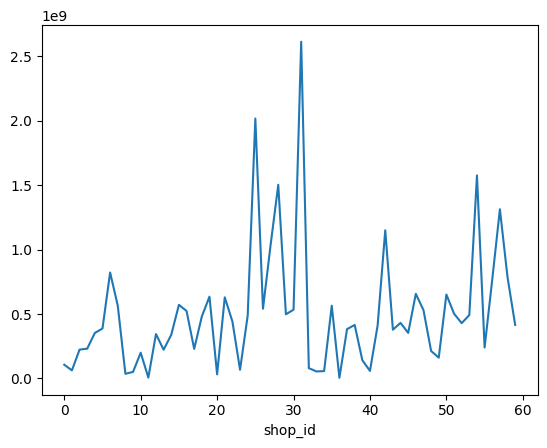

In [68]:
# plot the sales of the products over months
sales_train.groupby('shop_id')['item_id'].sum().plot()

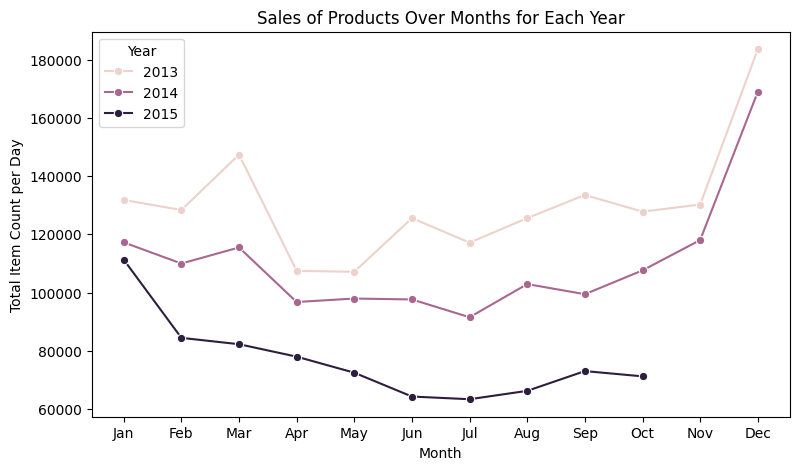

In [69]:

# Plot the sales of the products over months for each year all overlapping on each other so that we can compare them
# Group by year and month to sum item counts per day
# Convert the date column to datetime
sales_train['date'] = pd.to_datetime(sales_train['date'], format='%d.%m.%Y')
sales_train['year'] = sales_train['date'].dt.year
sales_train['month'] = sales_train['date'].dt.month

# Define month abbreviations
month_abbr = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}
sales_train['month_abbr'] = sales_train['month'].map(month_abbr)

# Group by year and month to sum item counts per day
monthly_sales = sales_train.groupby(['year', 'month', 'month_abbr'])['item_cnt_day'].sum().reset_index()

# Sort by month to ensure correct plotting order
monthly_sales = monthly_sales.sort_values(by='month')

# Plotting
plt.figure(figsize=(9, 5))
sns.lineplot(data=monthly_sales, x='month_abbr', y='item_cnt_day', hue='year', marker='o')
plt.legend(title='Year')
plt.xlabel('Month')
plt.ylabel('Total Item Count per Day')
plt.title('Sales of Products Over Months for Each Year')
plt.show()
